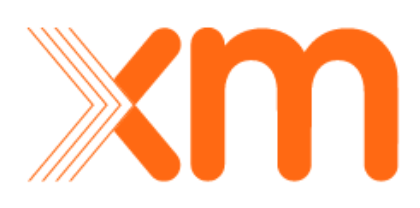

Caso de ejemplo desarrollado por el equipo de analitica de XM.

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar las métricas que se encuentran disponibles en el servicio
* Explicar cómo consultar una variable determinada
* Explicar cómo consultar una variable determinada usando filtros

**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Método para conocer los cruces existentes de una métrica](#section3)

4. [Consultar variables](#section4)

5. [Consultar variables usando filtros](#section5)


<a id='section1'></a>
# Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [ ]:
#pip install pydataxm

<a id='section2'></a>
# Importación de librerías

In [1]:
from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar
import datetime as dt                            

La versión de la libreria pydataxm que se esta usando es 0.3.0 en abril del 2022

In [2]:
objetoAPI = pydataxm.ReadDB()                    #Se almacena el servicio en el nombre objetoAPI

<a id='section3'></a>
# Método para conocer las metricas disponibles para las consultas

In [3]:
df =objetoAPI.get_collections() #El método get_collection sin argumentos retorna todas las variables que se tienen disponible en la API y que se pueden consultar  
df.head()                       #Se presentan como ejemplo las 5 primeras varibles disponibles

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
0,DemaReal,Demanda Real,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados q...
1,DemaReal,Demanda Real,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados q...
2,ExpoMoneda,Exportaciones Moneda,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,$,Transferencias de Energia desde Colombia hacia...
3,DemaCome,Demanda Comercial,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
4,Gene,Generación,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nac...


-**MetricID:** Identificador único de la metrica a consultar.

-**MetricName:** Nombre completo del identificador MetricID.

-**Entity:** Parámetro de agrupación de la metrica.

-**MaxDays:** Cantidad máxima de dias disponibles en la consulta.

-**Type:**	Granularidad con la que se reportan los datos. 

-**Url:**	Endpoint de la consulta de datos.

-**Filter:** Filtro por parámetro de consulta.

-**MetricUnits:** Unidad de medida de la métrica.	

-**MetricDescription:** Descripción del parámetro de consulta. 

<a id='section4'></a>
# Método para conocer los cruces existentes de una métrica

A continuación presentamos la forma para consultar los cruces para una métrica en particular. Se debe ingresar el MetricId de la variable indicada.
Veamos un ejemplo para los cruces de la metrica demanda comercial cuyo MetricId es "*DemaCome*"

In [4]:
df =objetoAPI.get_collections("DemaCome") #El método get_collection con argumentos retorna los cruces de las varibles que se quieren consultar
df

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
3,DemaCome,Demanda Comercial,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
11,DemaCome,Demanda Comercial,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Considera la demanda propia de cada comerciali...
79,DemaCome,Demanda Comercial,MercadoComercializacion,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...


Veamos un ejemplo con otra variable disponible en la API.

In [5]:
df =objetoAPI.get_collections("CargoUsoSTN") #El método get_collection con argumentos retorna los cruces de las varibles que se quieren consultar
df

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
138,CargoUsoSTN,Cargos por Uso STN,Sistema,731,MonthlyEntities,http://servapibi.xm.com.co/monthly,No aplica,$,Valor que recibe el agente transmisor por uso ...


<a id='section5'></a>
# Consultar variables

In [6]:
df_variable = objetoAPI.request_data(
                        "DemaCome",           #Se indica el nombre de la métrica tal como se llama en el campo metricId
                        "Agente",             #Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2022, 1, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(2022, 1, 15)) #Corresponde a la fecha final de la consulta

df_variable.head(5)                           #Observar el encabezado del DataFrame extraido

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Agente,AAGG,39.34,47.84,53.16,44.65,48.90,37.21,NaN,8.51,...,NaN,NaN,NaN,56.35,37.21,38.27,46.78,44.65,46.78,2022-01-01
1,Agente,ABAG,NaN,NaN,NaN,5.80,10.67,10.13,12.14,4.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01
2,Agente,ADCG,NaN,NaN,NaN,5.60,10.25,9.73,11.69,4.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01
3,Agente,ASCC,1990.01,1957.49,1887.27,1855.60,1857.67,1910.44,1785.93,1896.93,...,2446.76,2379.88,2337.69,2578.96,2538.32,2469.80,2412.30,2198.20,2045.82,2022-01-01
4,Agente,CASC,57368.46,56748.57,55760.22,54358.51,53244.62,51277.65,47358.38,50039.00,...,53668.00,53746.34,54789.46,63794.95,65618.96,65402.51,63491.64,60884.81,57927.74,2022-01-01


In [ ]:
df_variable.head()

In [ ]:
df_variable = objetoAPI.request_data(
                        "PrecBolsNaci",           #Se indica el nombre de la métrica tal como se llama en el campo metricId
                        "Sistema",               #Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2020, 1, 1),     #Corresponde a la fecha inicial de la consulta
                        dt.date(2021, 7, 10))    #Corresponde a la fecha final de la consulta
df_variable.head(5)

# Consultar variables usando filtros

In [ ]:
df_variable = objetoAPI.request_data(
                    "DemaCome",                    #Se indica el nombre de la métrica tal como se llama en el campo metricId
                    "Agente",                      #Se indica el nombre de la entidad tal como se llama en el campo Entity
                    dt.date(2020, 1, 1),           #Corresponde a la fecha inicial de la consulta
                    dt.date(2021, 7, 10),          #Corresponde a la fecha final de la consulta
                    filtros =['ADCG', 'AAGG'])     #Se indican los códigos SIC de plantas dentro de una lista
df_variable